In [398]:
import os 
import numpy as np 
import cv2
import glob
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.models import Model
import re
import pydicom
from PIL import Image
import numpy as np
import dicom2jpg
import shutil
from scipy.ndimage import label
from tensorflow.keras.preprocessing import image


In [399]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)



def delete_all_files(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            # Construct the full file path
            file_path = os.path.join(root, file_name)
            # Check if it's a file (not a directory)
            if os.path.isfile(file_path):
                # Delete the file
                os.remove(file_path)

    

    

In [400]:

directory = os.path.join("Gluecose ONG TEST IMAGES")
create_dir(directory)
import os
import re
def natural_sort_key(s):
    """ Sort string in a human-readable way, handling numbers correctly. """
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]

# Get a list of all the png files in the directory
files = [f for f in os.listdir(directory) if f.endswith('.png')]
files.sort(key=natural_sort_key)

# Rename each file
for i, filename in enumerate(files):
    new_name = f"{i}.png"
    os.rename(os.path.join(directory, filename), os.path.join(directory, new_name))



In [401]:
dataset_path = os.path.join("dataset", "aug")
files_dir= os.path.join("files", "aug")
model_file=os.path.join(files_dir, "unet_FULL_BRAIN.h5")
0








create_dir(files_dir)

In [402]:

model2=tf.keras.models.load_model(model_file)
model2.summary()



Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 128, 128, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_18 (BatchN  (None, 128, 128, 64  256        ['conv2d_19[0][0]']              
 ormalization)                  )                                                              

In [403]:

save_path= os.path.join("prediction")
create_dir(save_path)
delete_all_files(save_path)
test_x=sorted(glob.glob(os.path.join(directory,"*")))

print(len(test_x))
time_taken=[]
import time
for x in tqdm(test_x):
    name=x.split("/")[-1]
    print(name)
    x= cv2.imread(x ,cv2.IMREAD_COLOR)
    x=x / 255.0
    x=np.expand_dims(x,axis=0)
    start_time=time.time()
    p= model2.predict(x)[0]
    total_time=time.time()-start_time
    time_taken.append(total_time)
    p=p>0.5
    p=p*255
    cv2.imwrite(os.path.join(save_path, name),p)


90


  0%|          | 0/90 [00:00<?, ?it/s]

0.png
1/1 [==============================] - 0s 300ms/step


  1%|          | 1/90 [00:00<00:31,  2.83it/s]

1.png
1/1 [==============================] - 0s 28ms/step
10.png
1/1 [==============================] - 0s 31ms/step


  3%|▎         | 3/90 [00:00<00:13,  6.69it/s]

11.png
1/1 [==============================] - 0s 28ms/step
12.png
1/1 [==============================] - 0s 53ms/step


  6%|▌         | 5/90 [00:00<00:10,  7.81it/s]

13.png
1/1 [==============================] - 0s 42ms/step


  7%|▋         | 6/90 [00:00<00:10,  8.05it/s]

14.png
1/1 [==============================] - 0s 54ms/step


  8%|▊         | 7/90 [00:00<00:10,  7.87it/s]

15.png
1/1 [==============================] - 0s 49ms/step


  9%|▉         | 8/90 [00:01<00:10,  8.16it/s]

16.png
1/1 [==============================] - 0s 43ms/step


 10%|█         | 9/90 [00:01<00:09,  8.61it/s]

17.png
1/1 [==============================] - 0s 51ms/step


 11%|█         | 10/90 [00:01<00:10,  7.88it/s]

18.png
1/1 [==============================] - 0s 48ms/step


 12%|█▏        | 11/90 [00:01<00:09,  8.09it/s]

19.png
1/1 [==============================] - 0s 22ms/step
2.png
1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 13/90 [00:01<00:07, 10.40it/s]

20.png
1/1 [==============================] - 0s 30ms/step
21.png
1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 15/90 [00:01<00:06, 12.20it/s]

22.png
1/1 [==============================] - 0s 31ms/step
23.png
1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 17/90 [00:01<00:05, 13.48it/s]

24.png
1/1 [==============================] - 0s 21ms/step
25.png
1/1 [==============================] - 0s 22ms/step


 21%|██        | 19/90 [00:01<00:04, 14.70it/s]

26.png
1/1 [==============================] - 0s 34ms/step
27.png
1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 21/90 [00:02<00:05, 13.18it/s]

28.png
1/1 [==============================] - 0s 53ms/step
29.png
1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 23/90 [00:02<00:05, 11.64it/s]

3.png
1/1 [==============================] - 0s 47ms/step
30.png
1/1 [==============================] - 0s 51ms/step


 28%|██▊       | 25/90 [00:02<00:06, 10.43it/s]

31.png
1/1 [==============================] - 0s 42ms/step
32.png
1/1 [==============================] - 0s 28ms/step


 30%|███       | 27/90 [00:02<00:05, 10.53it/s]

33.png
1/1 [==============================] - 0s 20ms/step
34.png
1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 29/90 [00:02<00:05, 12.10it/s]

35.png
1/1 [==============================] - 0s 31ms/step
36.png
1/1 [==============================] - 0s 31ms/step


 34%|███▍      | 31/90 [00:02<00:04, 12.92it/s]

37.png
1/1 [==============================] - 0s 29ms/step
38.png
1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 33/90 [00:03<00:04, 13.97it/s]

39.png
1/1 [==============================] - 0s 22ms/step
4.png
1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 35/90 [00:03<00:03, 15.07it/s]

40.png
1/1 [==============================] - 0s 21ms/step
41.png
1/1 [==============================] - 0s 21ms/step


 41%|████      | 37/90 [00:03<00:03, 15.84it/s]

42.png
1/1 [==============================] - 0s 22ms/step
43.png
1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 39/90 [00:03<00:03, 16.31it/s]

44.png
1/1 [==============================] - 0s 26ms/step
45.png
1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 41/90 [00:03<00:03, 16.23it/s]

46.png
1/1 [==============================] - 0s 25ms/step
47.png
1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 43/90 [00:03<00:02, 16.63it/s]

48.png
1/1 [==============================] - 0s 35ms/step
49.png
1/1 [==============================] - 0s 31ms/step


 50%|█████     | 45/90 [00:03<00:02, 15.75it/s]

5.png
1/1 [==============================] - 0s 28ms/step
50.png
1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 47/90 [00:03<00:02, 15.99it/s]

51.png
1/1 [==============================] - 0s 30ms/step
52.png
1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 49/90 [00:04<00:02, 15.57it/s]

53.png
1/1 [==============================] - 0s 29ms/step
54.png
1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 51/90 [00:04<00:02, 14.24it/s]

55.png
1/1 [==============================] - 0s 75ms/step
56.png
1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 53/90 [00:04<00:03, 11.20it/s]

57.png
1/1 [==============================] - 0s 26ms/step
58.png
1/1 [==============================] - 0s 21ms/step


 61%|██████    | 55/90 [00:04<00:02, 12.64it/s]

59.png
1/1 [==============================] - 0s 26ms/step
6.png
1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 57/90 [00:04<00:02, 13.88it/s]

60.png
1/1 [==============================] - 0s 21ms/step
61.png
1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 59/90 [00:04<00:02, 14.96it/s]

62.png
1/1 [==============================] - 0s 23ms/step
63.png
1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 61/90 [00:04<00:01, 15.19it/s]

64.png
1/1 [==============================] - 0s 24ms/step
65.png
1/1 [==============================] - 0s 20ms/step


 70%|███████   | 63/90 [00:05<00:01, 15.41it/s]

66.png
1/1 [==============================] - 0s 24ms/step
67.png
1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 65/90 [00:05<00:01, 15.47it/s]

68.png
1/1 [==============================] - 0s 27ms/step
69.png
1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 67/90 [00:05<00:01, 15.47it/s]

7.png
1/1 [==============================] - 0s 23ms/step
70.png
1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 69/90 [00:05<00:01, 15.60it/s]

71.png
1/1 [==============================] - 0s 28ms/step
72.png
1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 71/90 [00:05<00:01, 15.68it/s]

73.png
1/1 [==============================] - 0s 23ms/step
74.png
1/1 [==============================] - 0s 20ms/step


 81%|████████  | 73/90 [00:05<00:01, 16.09it/s]

75.png
1/1 [==============================] - 0s 24ms/step
76.png
1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 75/90 [00:05<00:00, 16.27it/s]

77.png
1/1 [==============================] - 0s 22ms/step
78.png
1/1 [==============================] - 0s 30ms/step


 86%|████████▌ | 77/90 [00:05<00:00, 16.31it/s]

79.png
1/1 [==============================] - 0s 29ms/step
8.png
1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 79/90 [00:06<00:00, 16.15it/s]

80.png
1/1 [==============================] - 0s 66ms/step
81.png
1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 81/90 [00:06<00:00, 14.67it/s]

82.png
1/1 [==============================] - 0s 23ms/step
83.png
1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 83/90 [00:06<00:00, 15.57it/s]

84.png
1/1 [==============================] - 0s 20ms/step
85.png
1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 85/90 [00:06<00:00, 16.30it/s]

86.png
1/1 [==============================] - 0s 20ms/step
87.png
1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 87/90 [00:06<00:00, 16.65it/s]

88.png
1/1 [==============================] - 0s 29ms/step
89.png
1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 89/90 [00:06<00:00, 16.60it/s]

9.png
1/1 [==============================] - 0s 29ms/step


100%|██████████| 90/90 [00:06<00:00, 13.26it/s]


In [404]:
import os
from PIL import Image
def composite_images(image_folder, mask_folder, output_folder):
    # Get the list of image files in the input folder
    image_files = os.listdir(image_folder)
    
    # Iterate through each image file
    for image_file in image_files:
        # Construct the file paths for the current image and its corresponding mask
        image_path = os.path.join(image_folder, image_file)
        mask_file = image_file.split('.')[0] + '.png'  # Assuming masks have the same filename format as images
        mask_path = os.path.join(mask_folder, mask_file)
        
        # Open the image and mask
        image = Image.open(image_path)
        mask = Image.open(mask_path)
        
        # Perform composite operation
        result = Image.composite(image, Image.new('RGB', image.size, (0, 0, 0)), mask)
        
        # Construct the output file path
        output_file = os.path.join(output_folder, image_file)
        
        # Save the resulting composite image
        result.save(output_file) 

# Paths to input image and mask folders, and output folder
image_folder = directory


mask_folder  = save_path
output_folder= os.path.join("segmentation")
create_dir(mask_folder )
create_dir(output_folder)
delete_all_files(output_folder)
# Call the function to composite images and masks and save the results
composite_images(image_folder, mask_folder, output_folder)

In [405]:
def make_image_black(image_path):
    # Open the image
    with Image.open(image_path) as img:
        # Create a black image with the same size as the original
        black_img = Image.new('RGB', img.size, (0, 0, 0))
        # Save the black image, replacing the original one
        black_img.save(image_path)
        print(f'Blacked out {os.path.basename(image_path)}')
# Loop through each image file in the folder

In [406]:
# Threshold for considering a pixel as black (0-255 scale)
black_threshold = 100  # Adjust this value as needed

# Percentage threshold for considering an image mostly black
percentage_threshold = 98  # Adjust this value as needed

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(output_folder) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff'))]

# Loop through each image file in the folder
for image_file in image_files:
    # Get the full path of the image
    image_path = os.path.join(output_folder, image_file)
    
    # Read the image
    img = cv2.imread(image_path)
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    total_pixels = img.size
    num_black_pixels = np.sum(img < black_threshold)
    black_percentage = (num_black_pixels / total_pixels) * 100
    if black_percentage > percentage_threshold:

        # Make the image black if it has more than 5 islands
        make_image_black(image_path)
        
        mask_image_path = os.path.join(mask_folder, os.path.basename(image_path))
        
        # Check if the mask image exists and make it black
        if os.path.exists(mask_image_path):
            make_image_black(mask_image_path)

print('Processing complete.')

Blacked out 78.png
Blacked out 78.png
Blacked out 79.png
Blacked out 79.png
Blacked out 75.png
Blacked out 75.png
Blacked out 85.png
Blacked out 85.png
Blacked out 82.png
Blacked out 82.png
Blacked out 2.png
Blacked out 2.png
Blacked out 4.png
Blacked out 4.png
Blacked out 10.png
Blacked out 10.png
Blacked out 87.png
Blacked out 87.png
Blacked out 76.png
Blacked out 76.png
Blacked out 84.png
Blacked out 84.png
Blacked out 86.png
Blacked out 86.png
Blacked out 1.png
Blacked out 1.png
Blacked out 81.png
Blacked out 81.png
Blacked out 13.png
Blacked out 13.png
Blacked out 8.png
Blacked out 8.png
Blacked out 80.png
Blacked out 80.png
Blacked out 83.png
Blacked out 83.png
Blacked out 77.png
Blacked out 77.png
Blacked out 74.png
Blacked out 74.png
Blacked out 89.png
Blacked out 89.png
Blacked out 88.png
Blacked out 88.png
Blacked out 0.png
Blacked out 0.png
Blacked out 6.png
Blacked out 6.png
Blacked out 11.png
Blacked out 11.png
Blacked out 14.png
Blacked out 14.png
Blacked out 9.png
Blacke

In [407]:
import os
import re
import cv2

area_array = []
png_arra = []
total_value= []
image_directory = mask_folder
# Get all filenames in the directory
filenames = os.listdir(image_directory)
# Sort filenames using regular expressions to sort numerically
sorted_filenames = sorted(filenames, key=lambda x: int(re.findall(r'\d+', x)[0]))

for filename in sorted_filenames:
    file_path = os.path.join(image_directory, filename)
    png_arra.append(file_path)
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    white_pixel_count = cv2.countNonZero(image)
    area_array.append(white_pixel_count)

print(area_array)

image_directory = output_folder
# Get all filenames in the directory
filenames = os.listdir(image_directory)
# Sort filenames using regular expressions to sort numerically
sorted_filenames = sorted(filenames, key=lambda x: int(re.findall(r'\d+', x)[0]))

for filename in sorted_filenames:
    file_path = os.path.join(image_directory, filename)
    png_arra.append(file_path)
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    total = np.sum(image)
    total_value.append(total)

#print(area_array, len(area_array))
#print(total_value, len(total_value))
#print(png_arra, len(png_arra))

array1= np.array(area_array)
array2=np.array(total_value)

print("Shape of array1:", array1.shape)
print("Shape of array2:", array2.shape)
result = np.where(array2 != 0,  array2/array1 , 0)

areas=array1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 739, 841, 892, 949, 1011, 1059, 1095, 1164, 1404, 1767, 2306, 2355, 2514, 2704, 2978, 3048, 3179, 3631, 3813, 4008, 4084, 4165, 4214, 4273, 4304, 4305, 4302, 4288, 4252, 4237, 4202, 4165, 4136, 4085, 4018, 3962, 3905, 3837, 3778, 3703, 3594, 3495, 3390, 3251, 3131, 3023, 2911, 2728, 2614, 2492, 2334, 2136, 1967, 1808, 1593, 1323, 1114, 964, 756, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Shape of array1: (90,)
Shape of array2: (90,)


/tmp/ipykernel_847/935451061.py:45: RuntimeWarning: invalid value encountered in divide
  result = np.where(array2 != 0,  array2/array1 , 0)


In [408]:
print(result)

[  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
 120.85656292 143.21165279 146.49887892 147.82297155 153.16023739
 152.59301228 152.30958904 154.17525773 160.76709402 125.30447085
 136.45793582 125.56730361 127.72792363 137.16900888 135.69576897
 132.45111549 137.64359862 134.65519141 134.03986362 144.07035928
 139.27252693 142.40672269 133.14404366 136.1830096  135.95910781
 133.242741   134.70897257 134.08138993 131.57925682 129.87255133
 123.09114707 122.68667467 131.66755319 128.82129743 122.04106521
 129.00328117 128.2793854  120.91217097 121.19772366 128.84499055
 125.7031163  129.90872675 132.37374631 137.28698862 140.74608751
 143.85114125 147.49295775 141.62463343 152.0351951  157.02808989
 161.68166238 158.75608614 159.57193696 159.05862832 152.52730697
 144.03401361 140.48204668 136.02385892 106.89550265   0.
   0.           0.           0.           

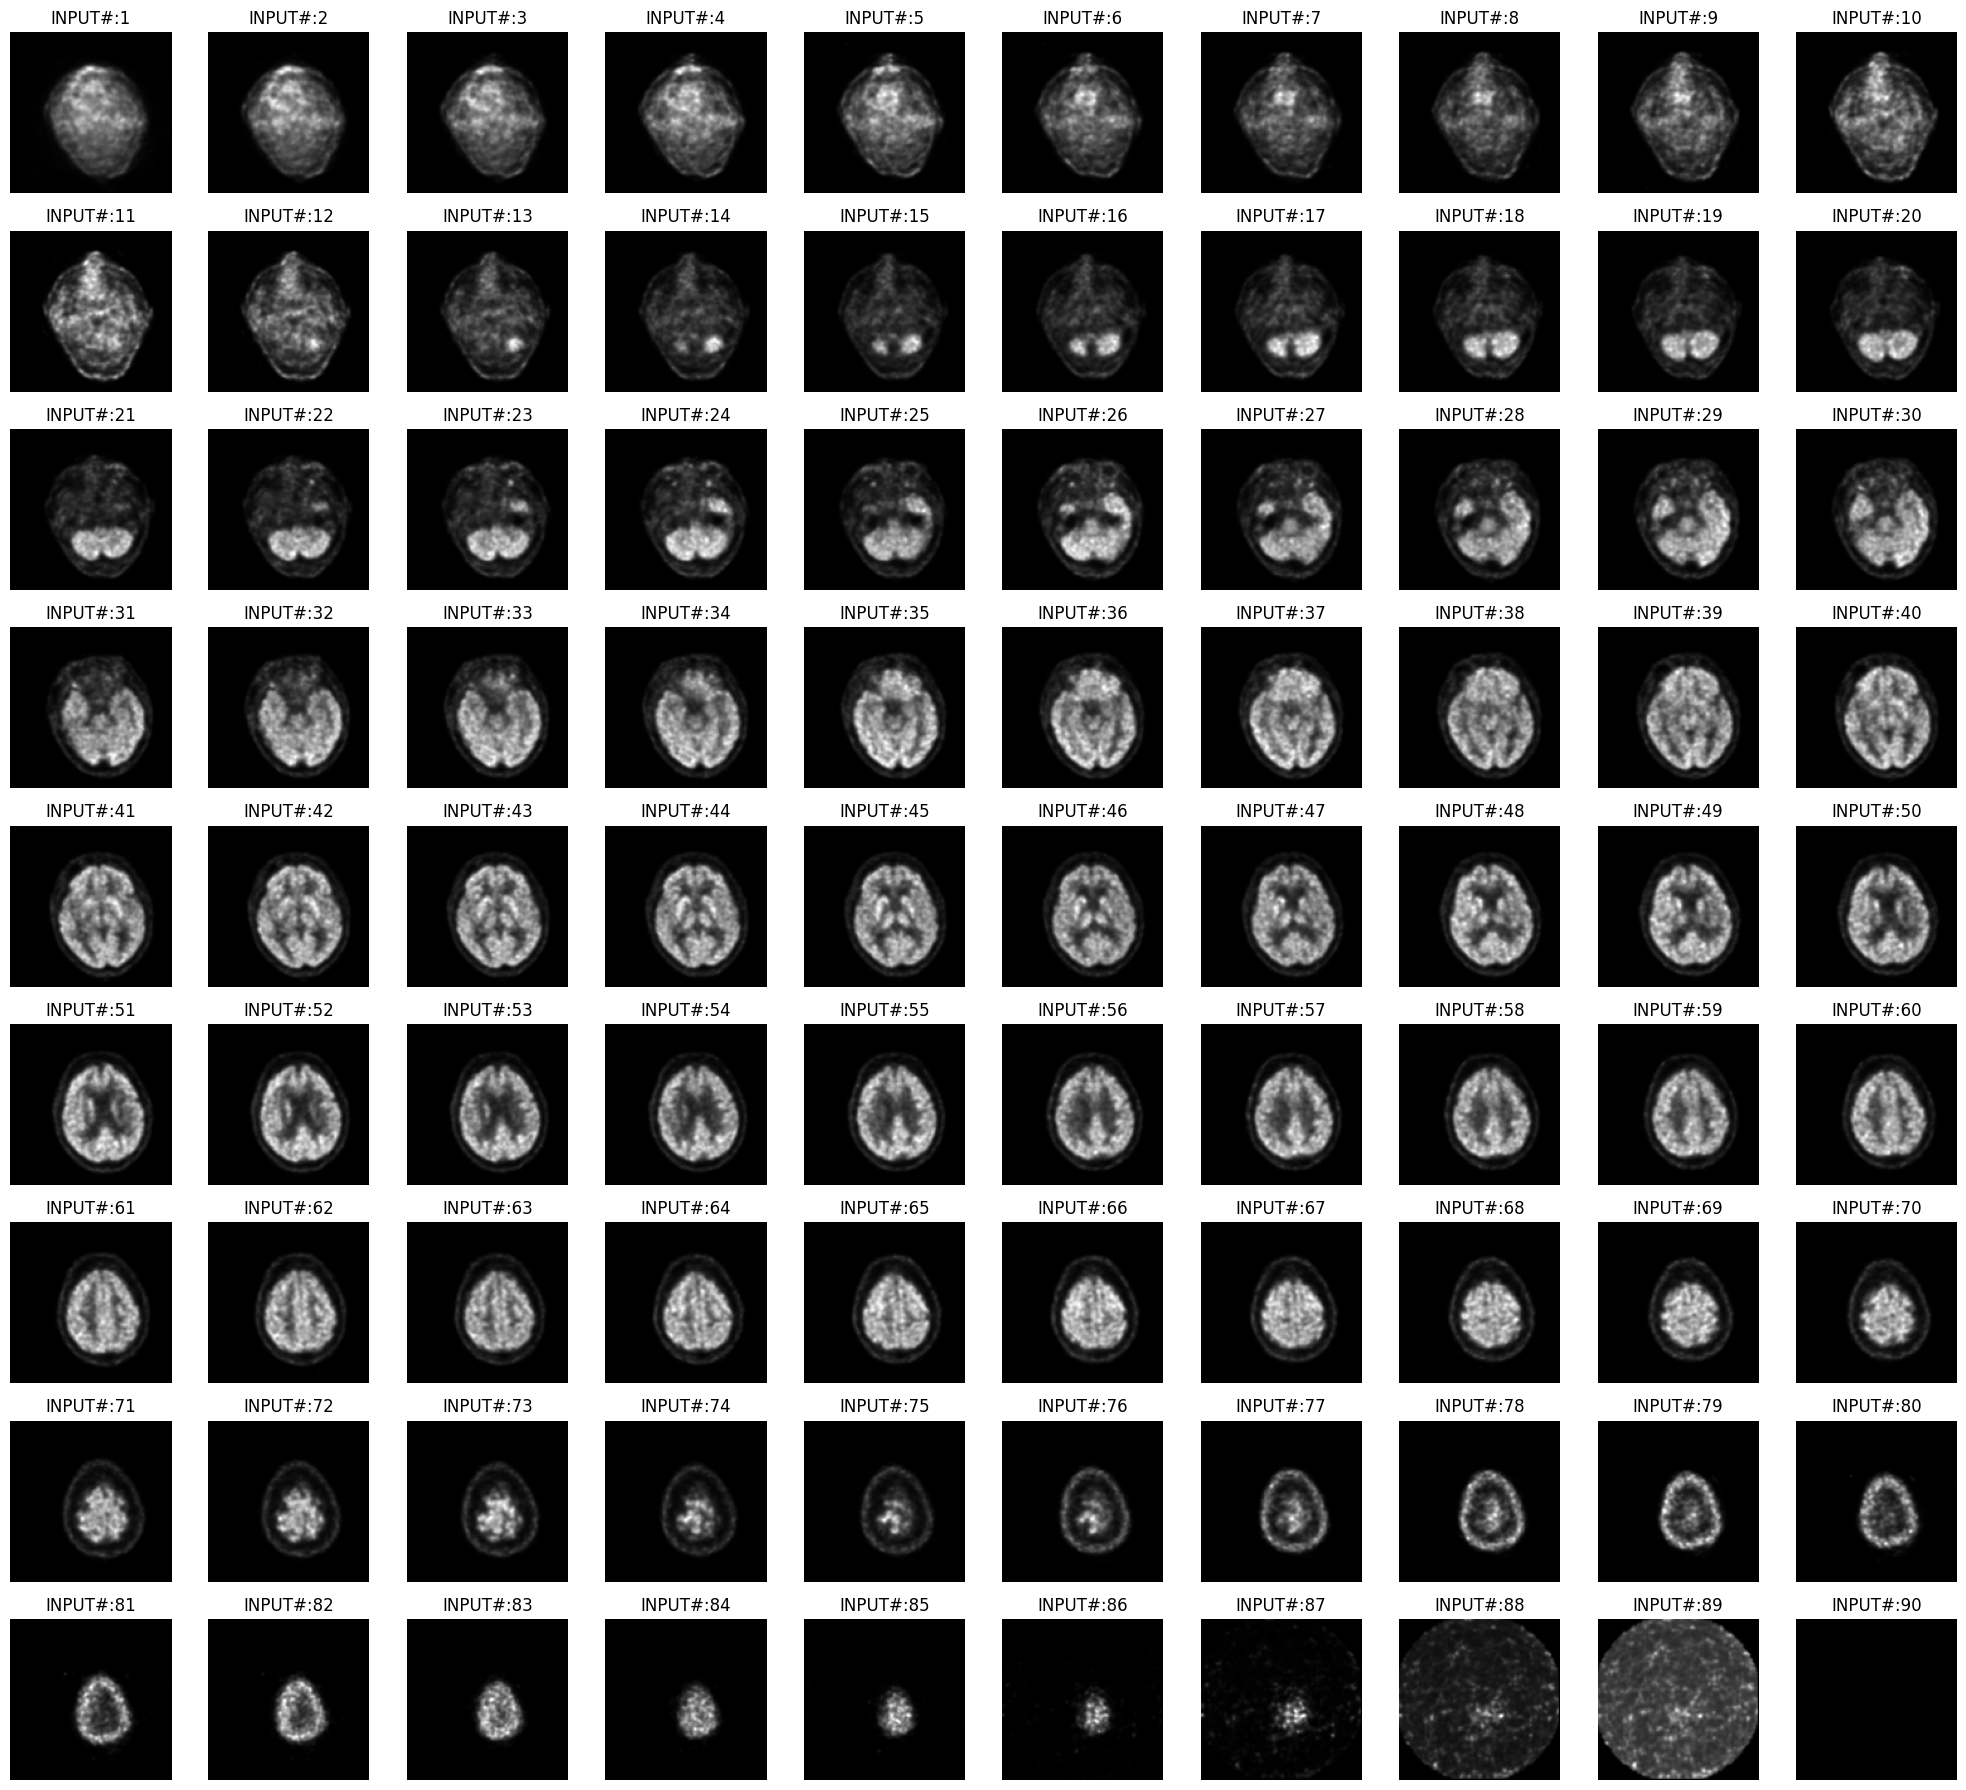

In [409]:
import matplotlib.pyplot as plt
import math
image_directory = directory
 # Array containing titles corresponding to each image
# Get all filenames in the directory
filenames = os.listdir(image_directory)
# Sort filenames using regular expressions to sort numerically
sorted_filenames = sorted(filenames, key=lambda x: int(re.findall(r'\d+', x)[0]))

num_images = len(sorted_filenames)
num_cols = 10  # Number of columns
num_rows = math.ceil(num_images / num_cols)  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 2))  # Dynamic figsize based on num_rows

for ax_row, row_index in zip(axes, range(num_rows)):
    for ax, filename in zip(ax_row, sorted_filenames[row_index * num_cols:]):
        file_path = os.path.join(image_directory, filename)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        ax.imshow(image, cmap='gray')
        ax.set_title("INPUT"+"#:"+str((int(filename.replace(".png", ""))+1))  )  # Set title from the results array
        ax.axis('off')  # Turn off axis

# Hide empty subplots if any
for i in range(num_images, num_rows * num_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

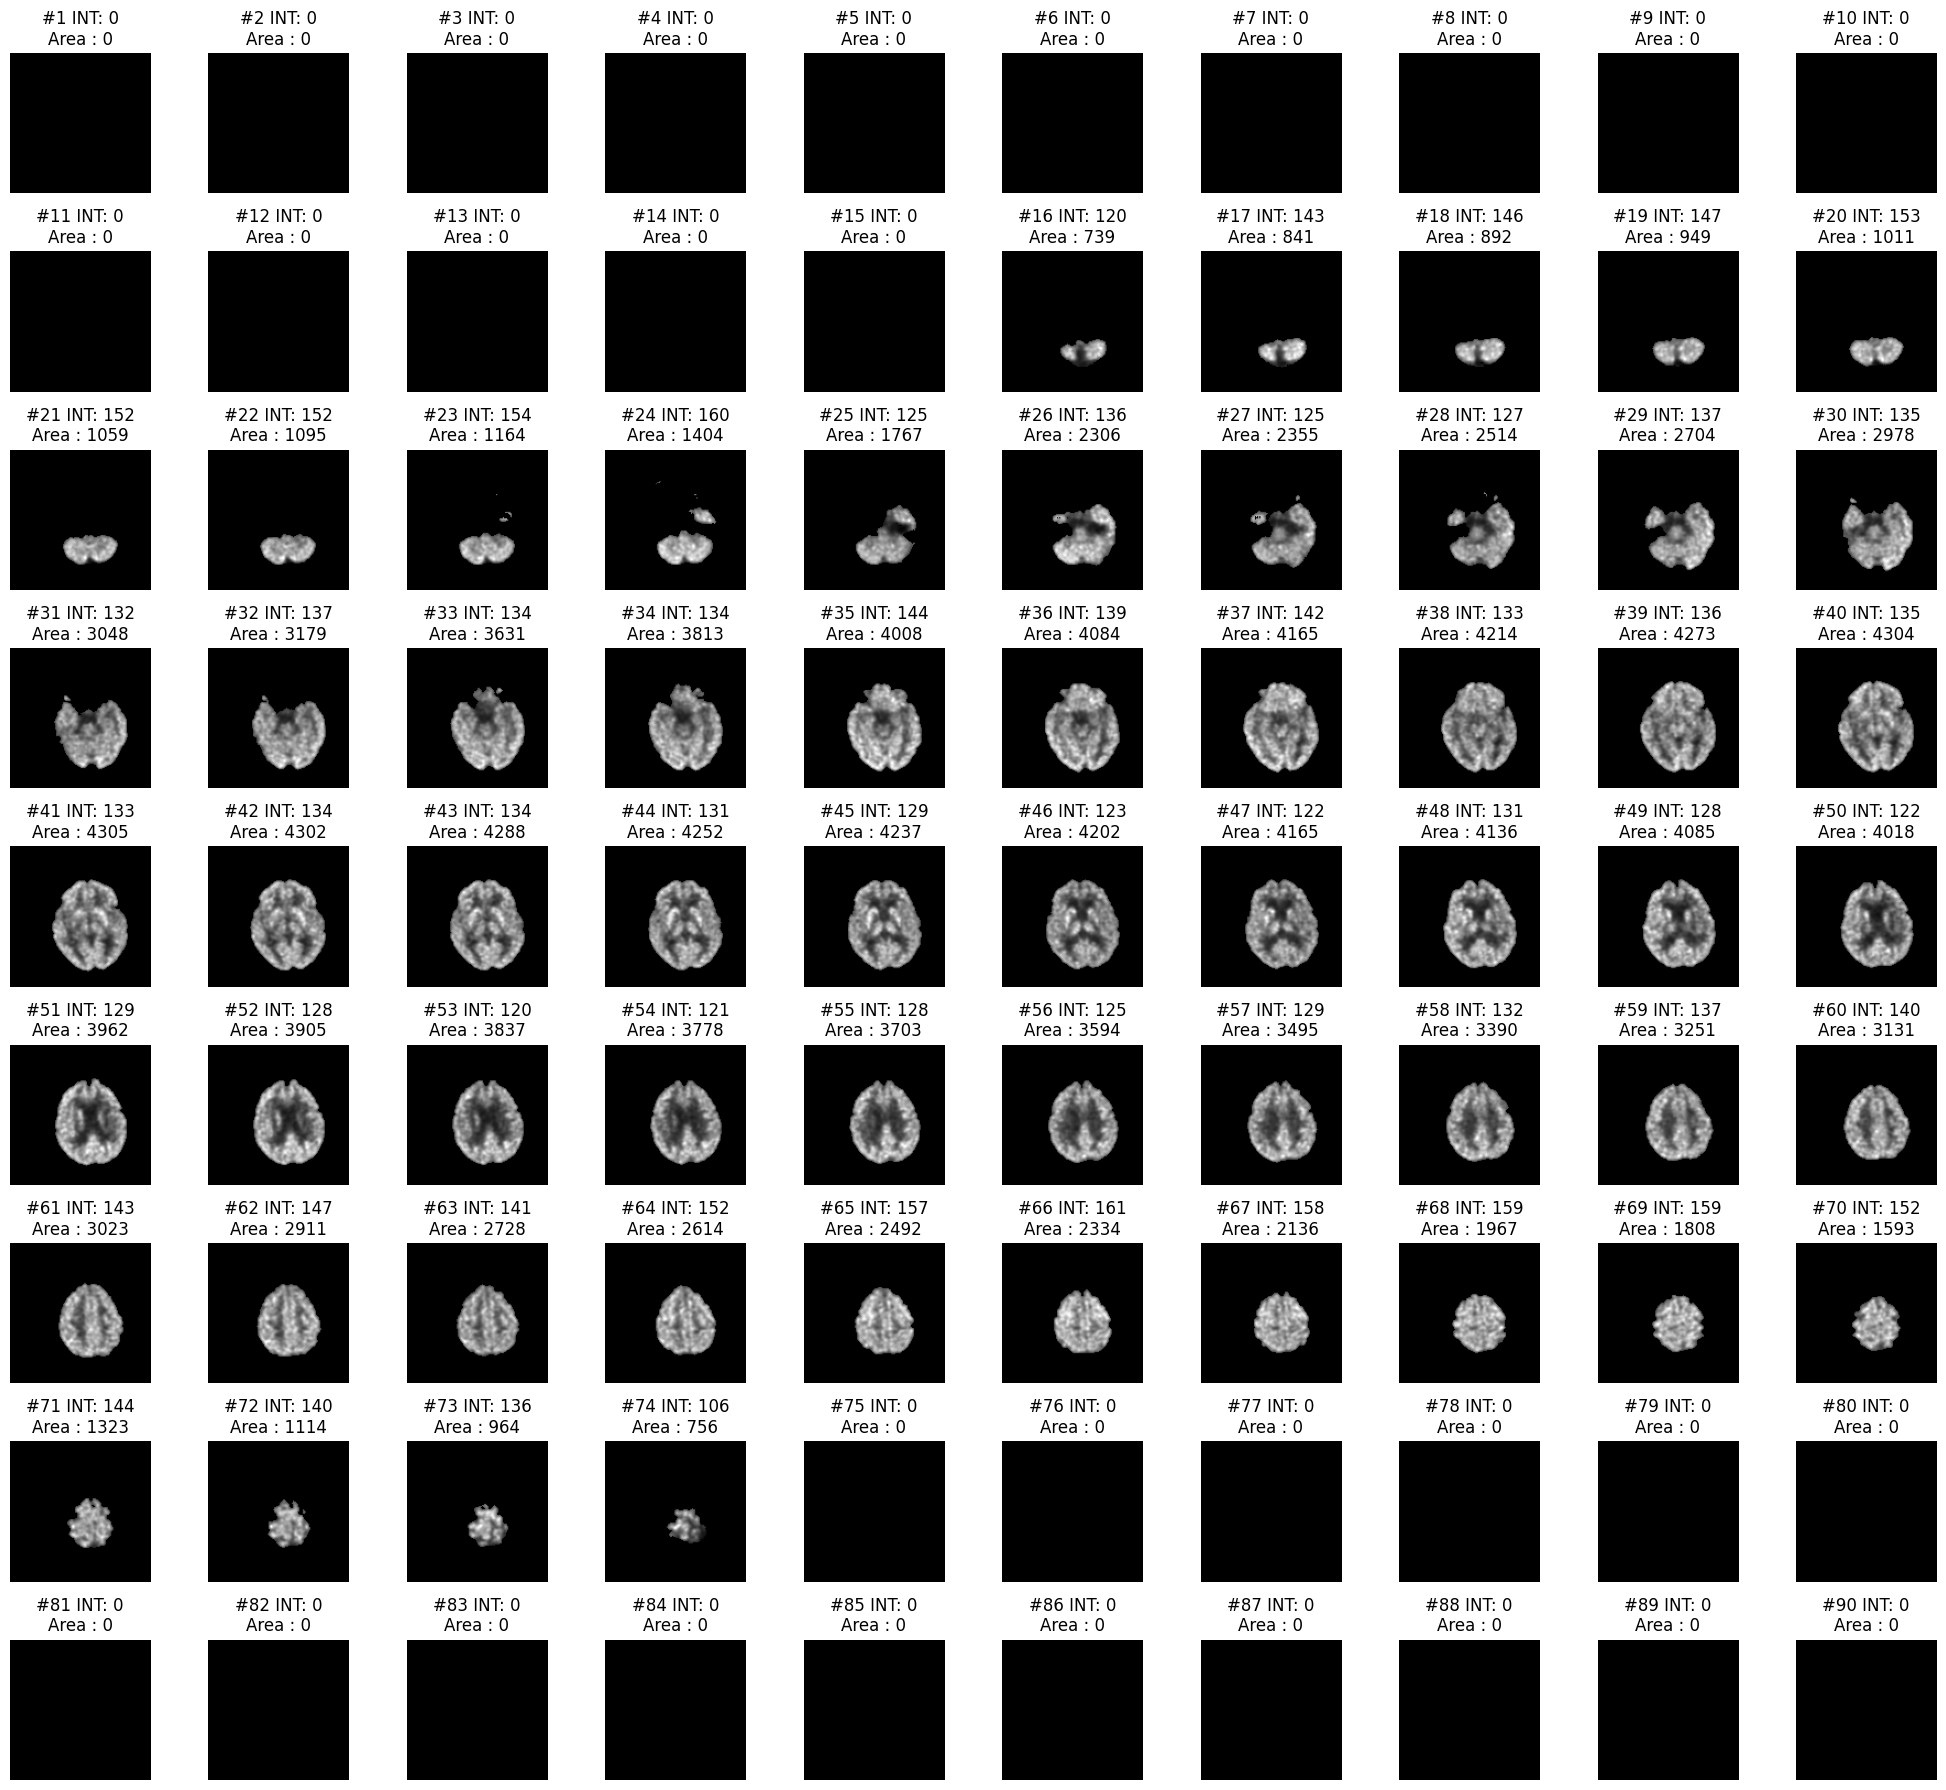

In [410]:
import matplotlib.pyplot as plt
import math
from textwrap import wrap


image_directory = output_folder
 # Array containing titles corresponding to each image
# Get all filenames in the directory
filenames = os.listdir(image_directory)
# Sort filenames using regular expressions to sort numerically
sorted_filenames = sorted(filenames, key=lambda x: int(re.findall(r'\d+', x)[0]))

num_images = len(sorted_filenames)
num_cols = 10  # Number of columns
num_rows = math.ceil(num_images / num_cols)  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 2))  # Dynamic figsize based on num_rows

for ax_row, row_index in zip(axes, range(num_rows)):
    for ax, filename, intentsity, area,  in zip(ax_row, sorted_filenames[row_index * num_cols:], result[row_index * num_cols:], areas[row_index * num_cols:]):
        file_path = os.path.join(image_directory, filename)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        ax.imshow(image, cmap='gray')
        title_l="#"+str((int(filename.replace(".png", ""))+1))+ " INT: "+str(int(intentsity))+ "         Area : " +str(int(area))
        wrapped_title = "\n".join(wrap(title_l, width=20))
        ax.set_title(wrapped_title)  # Set title from the results array
        ax.axis('off')  # Turn off axis

# Hide empty subplots if any
for i in range(num_images, num_rows * num_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


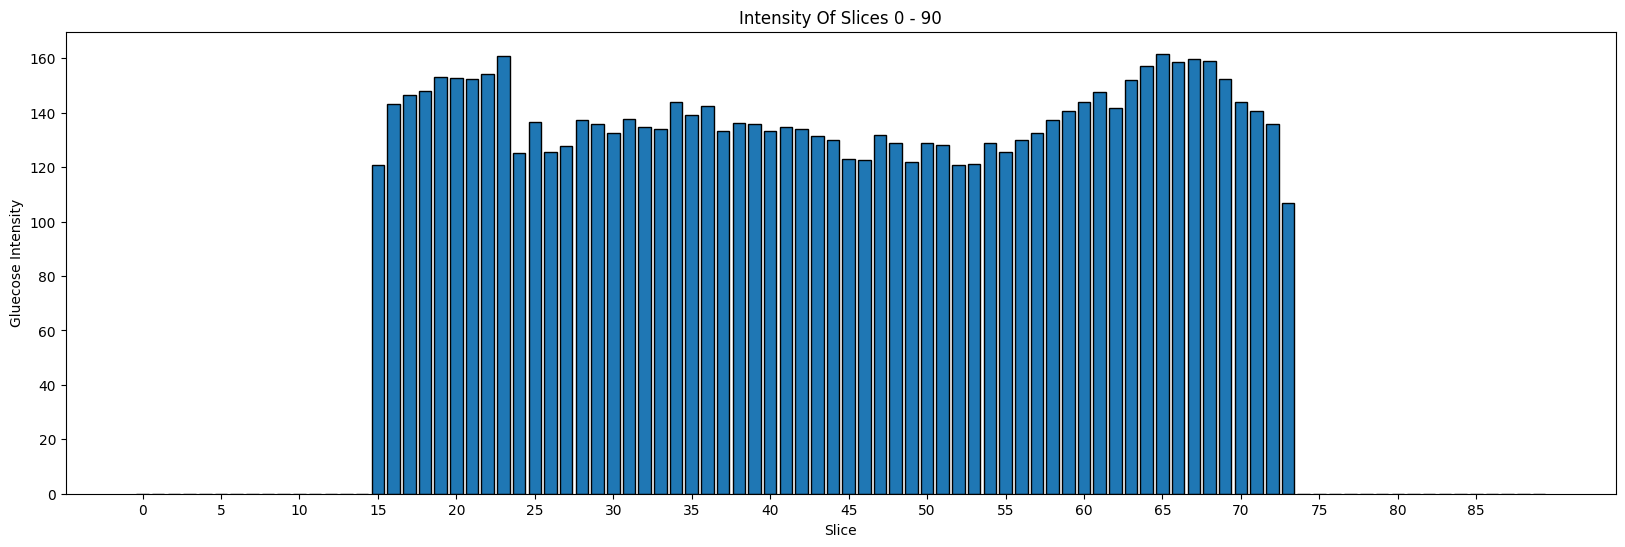

Mean: 137.90262939019638
Median: 136.02385892116183
Standard Deviation: 11.929858697508191
Variance: 142.32152854251183
[120.85656292 143.21165279 146.49887892 147.82297155 153.16023739
 152.59301228 152.30958904 154.17525773 160.76709402 125.30447085
 136.45793582 125.56730361 127.72792363 137.16900888 135.69576897
 132.45111549 137.64359862 134.65519141 134.03986362 144.07035928
 139.27252693 142.40672269 133.14404366 136.1830096  135.95910781
 133.242741   134.70897257 134.08138993 131.57925682 129.87255133
 123.09114707 122.68667467 131.66755319 128.82129743 122.04106521
 129.00328117 128.2793854  120.91217097 121.19772366 128.84499055
 125.7031163  129.90872675 132.37374631 137.28698862 140.74608751
 143.85114125 147.49295775 141.62463343 152.0351951  157.02808989
 161.68166238 158.75608614 159.57193696 159.05862832 152.52730697
 144.03401361 140.48204668 136.02385892 106.89550265]


In [411]:

import matplotlib.pyplot as plt

def plot_histogram(data):
    plt.figure(figsize=(20, 6))  # Adjust the width and height of the figure as needed
    plt.bar(range(len(data)), data, align='center', edgecolor='black')
    plt.xlabel('Slice')
    plt.ylabel('Gluecose Intensity')
    plt.title('Intensity Of Slices 0 - '+str(len(data)))
    plt.xticks(range(0, len(data), 5))  # Set ticks at increments of 10
    plt.grid(False)
    plt.show()



plot_histogram(result)




filtered_arr = result[result!= 0]

mean_value = np.mean(filtered_arr)
median_value = np.median(filtered_arr)
std_deviation = np.std(filtered_arr)
variance_value = np.var(filtered_arr)

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance_value}")
print(filtered_arr)